In [1]:

import plantuml
from IPython.display import SVG, display
import requests


def show_plant(txt):
    plnt_txt = plantuml.deflate_and_encode(txt)
    uri = "http://www.plantuml.com/plantuml/svg/" + plnt_txt
    htmldata = requests.get(uri)
    svg_txt = htmldata.text
    style_idx = svg_txt.find("style=") + len("style=") + 1
    svg_txt = svg_txt[:style_idx]+"background-color: white;"+svg_txt[style_idx:]
    display(SVG(svg_txt))

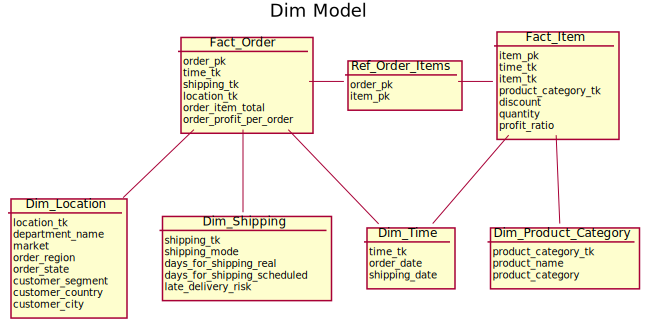

In [4]:
txt = """
title Dim Model


object Fact_Order {
    order_pk
    time_tk
    shipping_tk
    location_tk
    order_item_total
    order_profit_per_order
}

object Fact_Item {
    item_pk
    time_tk
    item_tk
    product_category_tk
    discount
    quantity
    profit_ratio
}

object Ref_Order_Items {
    order_pk
    item_pk
}


object Dim_Product_Category {
    product_category_tk
    product_name
    product_category
}

object Dim_Location {
    location_tk
    department_name
    market
    order_region
    order_state
    customer_segment
    customer_country
    customer_city
}

object Dim_Time {
    time_tk
    order_date
    shipping_date
}

object Dim_Shipping {
    shipping_tk
    shipping_mode
    days_for_shipping_real
    days_for_shipping_scheduled
    late_delivery_risk
}


Fact_Order -d- Dim_Location
Fact_Order -d- Dim_Time
Fact_Order -d- Dim_Shipping

Fact_Order -r- Ref_Order_Items
Ref_Order_Items -r- Fact_Item


Fact_Item -d- Dim_Product_Category
Fact_Item -d- Dim_Time

 """



show_plant(txt)